# DATATHON - Passos Magicos - Prop Analitica.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1ZzSgzfpGhTDRfaXnFVyOt3hWtUjo9v_B

# Objetivo principal

Como analista de dados realizar uma proposta analítica para demonstrar o impacto que a ONG “Passos Mágicos” tem realizado sobre a comunidade que atende.

**Modelo escolhido:**

**Proposta preditiva:** A ideia é demonstrar os impactos que a ONG “Passos Mágicos” realizou sobre o desempenho de estudantes e levantar indicadores de performance. Sendo assim, deve-se criar um dashboard e storytelling contando uma história com os dados para auxiliar a Passos Mágicos a tomar as melhores decisões com base nos indicadores e conhecer o perfil dos estudantes.

**Sobre a ONG – Passos Mágicos**

A Associação Passos Mágicos é uma organização não governamental fundada em 1992, dedicada a transformar vidas por meio da educação. Atuando principalmente no município de Embu-Guaçu, a ONG oferece programas educacionais complementares para crianças e jovens que frequentam o sistema público de ensino. Seu Programa de Aceleração do Conhecimento funciona no contraturno escolar, proporcionando aulas de português, matemática e inglês, além de assistência psicológica e psicopedagógica. Fontes: (eaesp.fgv.br)


**Indicadores Relevantes**

A análise pode ser estruturada em quatro dimensões principais:



*   Desempenho Acadêmico
*   Participação e Engajamento
*   Impacto Social
*   Comparação com a Média Geral
"""


In [1]:
import pandas as pd

# Carregar as abas do arquivo para verificar quais existem
xls = pd.ExcelFile("/content/PEDE 2024 - DATATHON.xlsx")
xls.sheet_names

# Caminho do arquivo
file_path = "/content/PEDE 2024 - DATATHON.xlsx"

# Carregar os dados das abas PEDE2022, PEDE2023 e PEDE2024
df_2022 = pd.read_excel(file_path, sheet_name="PEDE2022")
df_2023 = pd.read_excel(file_path, sheet_name="PEDE2023")
df_2024 = pd.read_excel(file_path, sheet_name="PEDE2024")

# Exibir as primeiras linhas de cada base para entender a estrutura
df_2022.head()
df_2023.head()
df_2024.head()

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


In [2]:
# Contar a quantidade de alunos em cada base de dados

# 2022
count_2022 = len(df_2022)
print(f"Quantidade de alunos em 2022: {count_2022}")

# 2023
count_2023 = len(df_2023)
print(f"Quantidade de alunos em 2023: {count_2023}")

# 2024
count_2024 = len(df_2024)
print(f"Quantidade de alunos em 2024: {count_2024}")


Quantidade de alunos em 2022: 860
Quantidade de alunos em 2023: 1014
Quantidade de alunos em 2024: 1156


**Os principais indicadores de performance presentes nas três bases de dados incluem:**

*   INDE (Índice de Desenvolvimento Educacional): Presente como INDE 2023 e INDE 2024.
*   IPV (Índice de Princípios e Valores): Indicador da adesão aos princípios da ONG.
*   IAN (Índice de Aprendizado Nota): Mede o desempenho acadêmico dos alunos.
*   Defasagem: Mede o atraso escolar em relação à fase ideal.

Vou consolidar esses indicadores e calcular a matriz de correlação para criar um gráfico visual representando as relações entre eles. ​

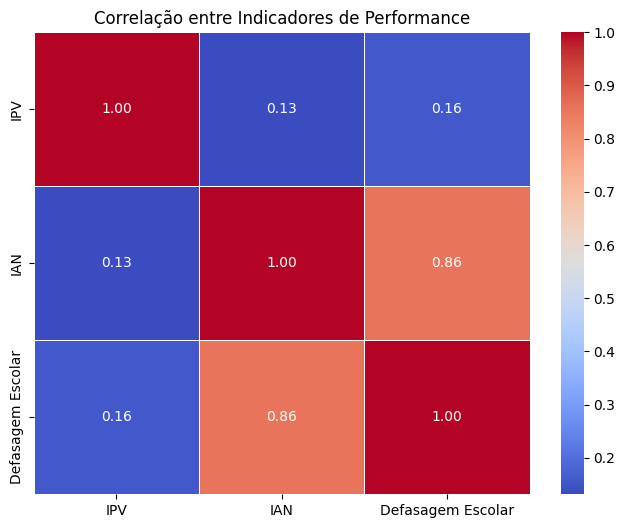

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas de interesse para cada ano
cols = ["INDE 2023", "IPV", "IAN", "Defasagem"]
df_2023_filtered = df_2023[cols].rename(columns={"INDE 2023": "INDE", "Defasagem": "Defasagem Escolar"})

cols = ["INDE 2024", "IPV", "IAN", "Defasagem"]
df_2024_filtered = df_2024[cols].rename(columns={"INDE 2024": "INDE", "Defasagem": "Defasagem Escolar"})

# Concatenar os dados de 2023 e 2024 para análise geral
df_corr = pd.concat([df_2023_filtered, df_2024_filtered], ignore_index=True)

# Calcular a matriz de correlação
correlation_matrix = df_corr.corr(numeric_only=True)

# Criar o gráfico de calor (heatmap) da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Indicadores de Performance")
plt.show()

**1 - Desempenho Acadêmico**

IDA (Indicador de Desempenho Acadêmico)

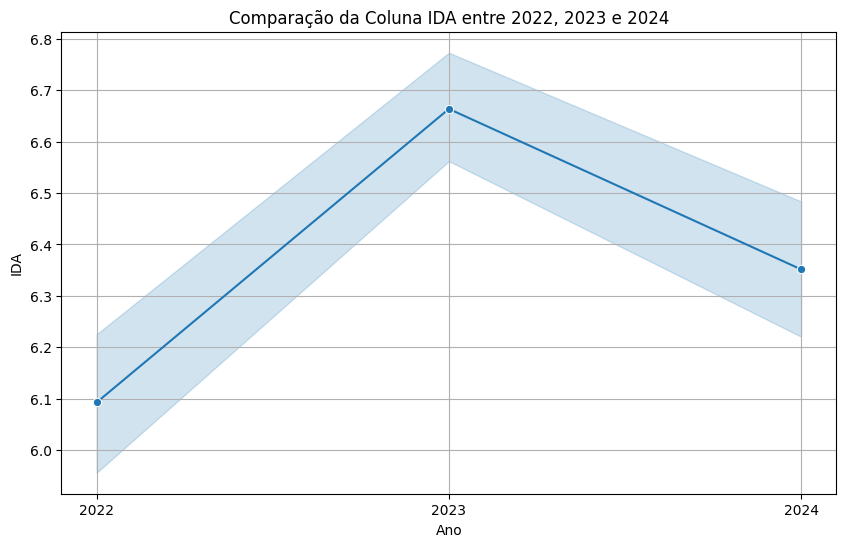

<ipython-input-4-1f2355247190>:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentual_acima = df_ida.groupby("Ano").apply(lambda x: (x["IDA"] > media_ida[x["Ano"].iloc[0]]).mean() * 100)


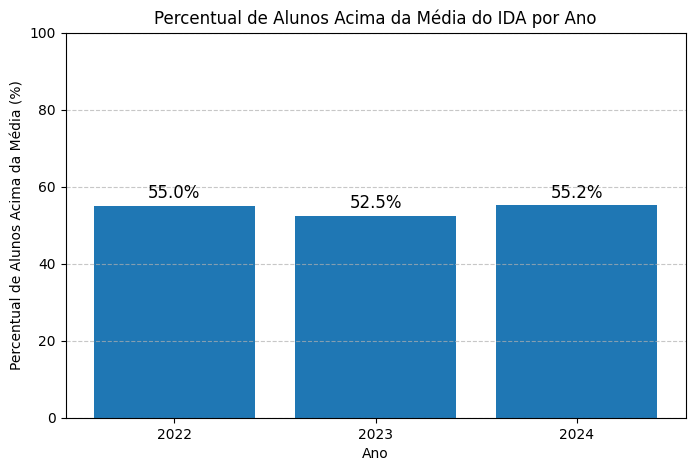

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar e renomear a coluna IDA para cada ano, se necessário
if "IDA" in df_2022.columns:
  df_2022_ida = df_2022[["IDA"]].copy()
else:
  df_2022_ida = pd.DataFrame()

if "IDA" in df_2023.columns:
  df_2023_ida = df_2023[["IDA"]].copy()
else:
  df_2023_ida = pd.DataFrame()

if "IDA" in df_2024.columns:
  df_2024_ida = df_2024[["IDA"]].copy()
else:
  df_2024_ida = pd.DataFrame()

# Adicionar uma coluna 'Ano' para identificar cada base
df_2022_ida["Ano"] = "2022"
df_2023_ida["Ano"] = "2023"
df_2024_ida["Ano"] = "2024"

# Concatenar as bases de dados
df_ida = pd.concat([df_2022_ida, df_2023_ida, df_2024_ida], ignore_index=True)


# Verificar se existem dados na coluna IDA para criar o gráfico
if not df_ida['IDA'].isnull().all() and not df_ida.empty:
    # Criar um gráfico de linha para comparar a coluna IDA entre os anos
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Ano", y="IDA", data=df_ida, marker="o")
    plt.title("Comparação da Coluna IDA entre 2022, 2023 e 2024")
    plt.xlabel("Ano")
    plt.ylabel("IDA")
    plt.grid(True)
    plt.show()
else:
    print("Não há dados disponíveis na coluna 'IDA' para criar o gráfico.")

"""O gráfico apresenta a evolução da média do indicador IDA entre os anos de 2022, 2023 e 2024, mostrando um aumento inicial de 2022 para 2023, seguido por uma queda em 2024. O valor médio do IDA cresce de aproximadamente 6.1 em 2022 para 6.7 em 2023, indicando melhora no desempenho, mas cai para 6.4 em 2024. A área sombreada ao redor da linha representa a variação ou intervalo de confiança, destacando a estabilidade relativa nos valores ao longo do período. A queda em 2024 pode refletir mudanças nas condições de ensino ou fatores externos que impactaram o desempenho geral dos alunos."""

# Listar todas as colunas para verificar o nome correto da variável IDA
df_2022.columns, df_2023.columns, df_2024.columns

import matplotlib.pyplot as plt

# Selecionar e renomear a coluna IDA para cada ano, se disponível
df_2022_ida = df_2022[['IDA']].copy() if 'IDA' in df_2022.columns else pd.DataFrame()
df_2023_ida = df_2023[['IDA']].copy() if 'IDA' in df_2023.columns else pd.DataFrame()
df_2024_ida = df_2024[['IDA']].copy() if 'IDA' in df_2024.columns else pd.DataFrame()

# Adicionar a coluna 'Ano'
df_2022_ida["Ano"] = "2022"
df_2023_ida["Ano"] = "2023"
df_2024_ida["Ano"] = "2024"

# Concatenar as bases de dados
df_ida = pd.concat([df_2022_ida, df_2023_ida, df_2024_ida], ignore_index=True)

# Remover valores nulos
df_ida = df_ida.dropna()

# Calcular a média do IDA por ano
media_ida = df_ida.groupby("Ano")["IDA"].mean()

# Calcular o percentual de alunos acima da média para cada ano
percentual_acima = df_ida.groupby("Ano").apply(lambda x: (x["IDA"] > media_ida[x["Ano"].iloc[0]]).mean() * 100)

# Criar um gráfico de barras para exibir os percentuais
plt.figure(figsize=(8, 5))
plt.bar(percentual_acima.index, percentual_acima.values)
plt.xlabel("Ano")
plt.ylabel("Percentual de Alunos Acima da Média (%)")
plt.title("Percentual de Alunos Acima da Média do IDA por Ano")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir os valores no topo das barras
for i, v in enumerate(percentual_acima.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha="center", fontsize=12)

# Mostrar o gráfico
plt.show()

**Interpretação do Gráfico e Análise dos Resultados.**

O gráfico apresenta o percentual de alunos que possuem um IDA acima da média do respectivo ano. No entanto, ao analisar os resultados, verificamos um comportamento interessante:

**Média do IDA por Ano:**

*   A média do IDA em 2023 está maior do que em 2022 e 2024. (Grafico comparação da coluna IDA entre anos)

*   Isso significa que, de forma geral, os alunos tiveram um desempenho melhor em 2023 do que nos outros anos.

**Percentual de Alunos Acima da Média:**

*   Apesar da média do IDA ser maior em 2023, o percentual de alunos que superaram essa média foi menor do que em 2022 e 2024.
*   Isso indica que a distribuição das notas em 2023 foi mais concentrada em torno da média, ou seja, houve menos alunos se destacando com notas muito acima da média.
*   Nos anos 2022 e 2024, a média foi menor, mas mais alunos superaram essa média, o que sugere que a dispersão dos valores do IDA pode ser maior nesses anos.

**Jutificativa:**

Aqui está o boxplot mostrando a distribuição do IDA para o ano de 2023. A linha vermelha pontilhada representa a média do IDA desse ano.

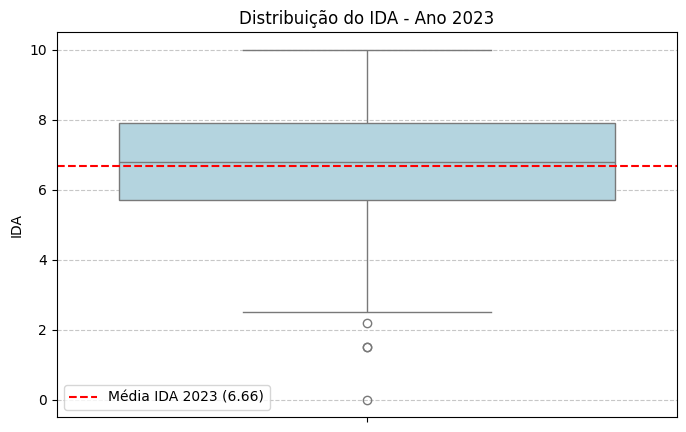

In [5]:
import seaborn as sns

# Criar um boxplot para visualizar a distribuição do IDA em 2023
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_2023_ida["IDA"], color="lightblue")

# Adicionar linha da média do IDA para 2023
media_2023 = df_2023_ida["IDA"].mean()
plt.axhline(media_2023, color="red", linestyle="--", label=f"Média IDA 2023 ({media_2023:.2f})")

# Configurações do gráfico
plt.title("Distribuição do IDA - Ano 2023")
plt.ylabel("IDA")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Exibir o gráfico
plt.show()

**Análise da Dispersão**

**Distribuição Compacta:** O gráfico sugere que a maioria dos alunos teve um desempenho próximo da média, com menos valores muito acima dela.

***Menos Outliers Acima da Média:*** Há poucos pontos acima da média, indicando que poucos alunos tiveram desempenho muito superior.

**Explicação para o Gráfico Anterior:** Como a maioria dos alunos está concentrada em torno da média, o percentual de alunos que superaram a média é menor do que em outros anos.

Média de notas (Português, matemática e inglês)

*   Notas médias em português, Matemática e inglês.
    (Período de 3 Anos)
    (PEDE2022, PEDE2023 e PEDE2024)

Aqui está o gráfico de linha comparando as médias das notas de Português, Matemática e Inglês para os anos de 2022, 2023 e 2024.

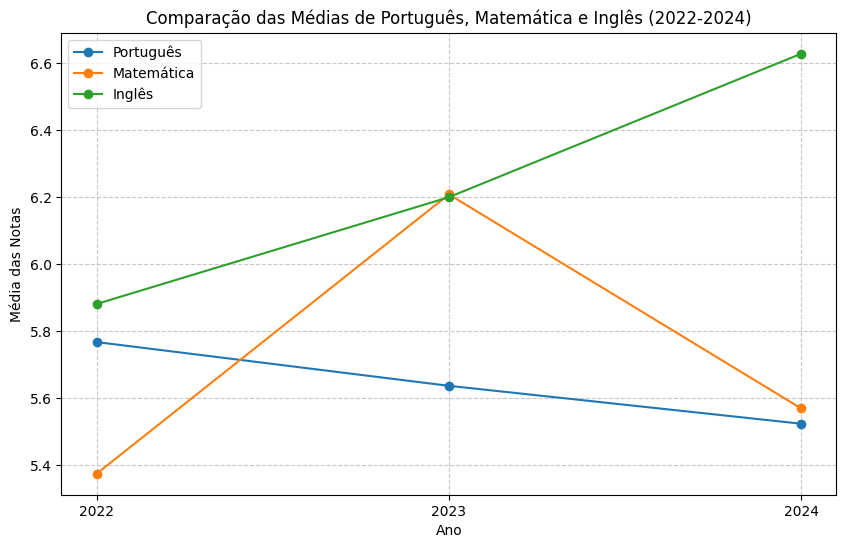

In [6]:
# Selecionar as colunas de Português, Matemática e Inglês para cada ano, se disponíveis
df_2022_notas = df_2022[['Portug', 'Matem', 'Inglês']].copy() if all(col in df_2022.columns for col in ['Portug', 'Matem', 'Inglês']) else pd.DataFrame()
df_2023_notas = df_2023[['Por', 'Mat', 'Ing']].copy() if all(col in df_2023.columns for col in ['Por', 'Mat', 'Ing']) else pd.DataFrame()
df_2024_notas = df_2024[['Por', 'Mat', 'Ing']].copy() if all(col in df_2024.columns for col in ['Por', 'Mat', 'Ing']) else pd.DataFrame()

# Renomear colunas para manter consistência
if not df_2022_notas.empty:
    df_2022_notas.columns = ['Português', 'Matemática', 'Inglês']
if not df_2023_notas.empty:
    df_2023_notas.columns = ['Português', 'Matemática', 'Inglês']
if not df_2024_notas.empty:
    df_2024_notas.columns = ['Português', 'Matemática', 'Inglês']

# Adicionar a coluna 'Ano'
df_2022_notas["Ano"] = "2022"
df_2023_notas["Ano"] = "2023"
df_2024_notas["Ano"] = "2024"

# Concatenar as bases de dados
df_notas = pd.concat([df_2022_notas, df_2023_notas, df_2024_notas], ignore_index=True)

# Remover valores nulos
df_notas = df_notas.dropna()

# Calcular a média de cada disciplina por ano
media_notas = df_notas.groupby("Ano").mean()

# Criar gráfico de linha para comparar as médias das disciplinas ao longo dos anos
plt.figure(figsize=(10, 6))
for disciplina in media_notas.columns:
    plt.plot(media_notas.index, media_notas[disciplina], marker='o', label=disciplina)

# Configurações do gráfico
plt.xlabel("Ano")
plt.ylabel("Média das Notas")
plt.title("Comparação das Médias de Português, Matemática e Inglês (2022-2024)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

**Análise dos Resultados:**

O gráfico compara as médias das disciplinas de Português, Matemática e Inglês entre os anos de 2022 e 2024. Observa-se que a média de Inglês apresenta um crescimento contínuo ao longo do período, alcançando o valor mais alto em 2024. Por outro lado, a média de Matemática sobe de 2022 para 2023, mas sofre uma queda significativa em 2024, ficando abaixo do valor de 2022. Já a média de Português demonstra uma leve queda constante ao longo dos anos, mantendo-se relativamente estável em comparação às demais disciplinas. Esses resultados indicam uma melhora contínua no desempenho em Inglês, enquanto Matemática e Português mostram tendências de declínio que podem demandar maior atenção.

**Comparação entre Ingressantes e Veteranos.**

Comparando as médias das notas de Português, Matemática e Inglês entre Ingressantes e Veteranos.


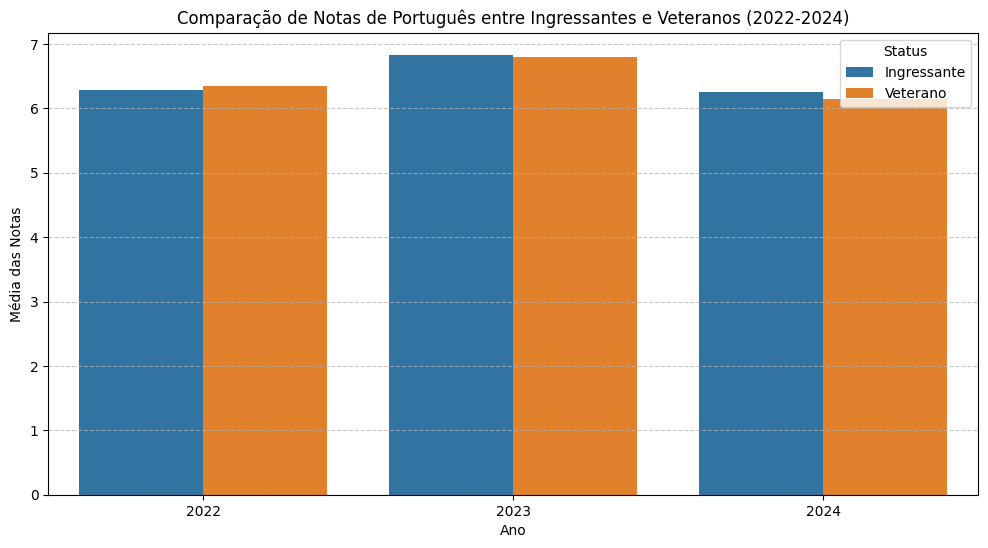

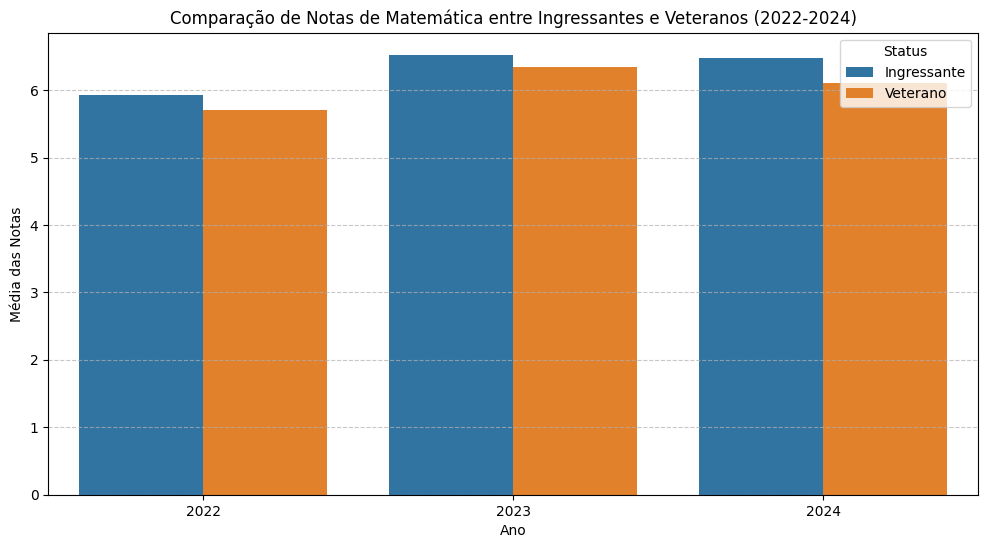

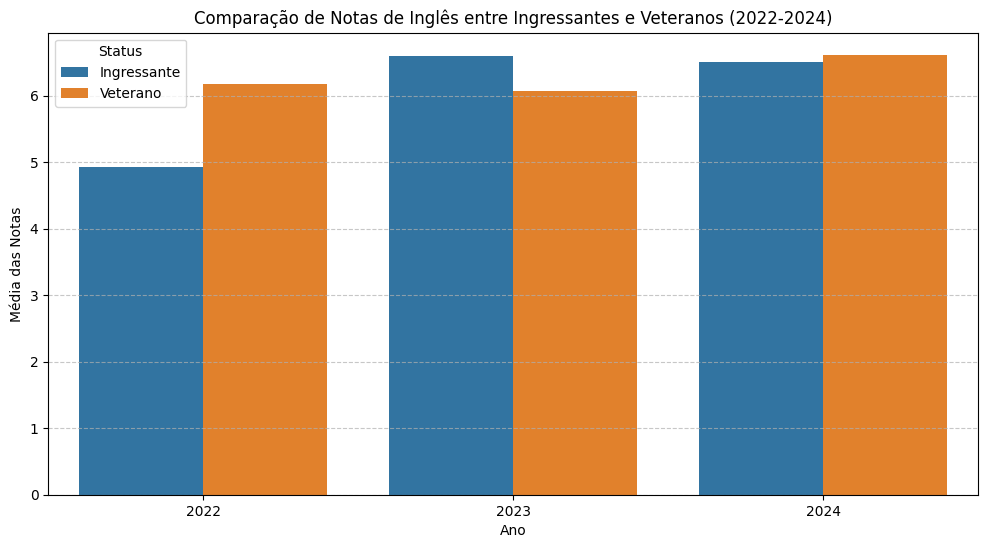

In [7]:
# Criar uma cópia dos dados com "Ano de Ingresso" e "Ano" para classificação
df_notas_ingresso = pd.DataFrame()

# Adicionar os dados de cada ano à tabela consolidada
if "Ano ingresso" in df_2022.columns:
    df_2022_temp = df_2022[["Ano ingresso", "Portug", "Matem", "Inglês"]].copy()
    df_2022_temp.columns = ["Ano de Ingresso", "Português", "Matemática", "Inglês"]
    df_2022_temp["Ano"] = "2022"
    df_notas_ingresso = pd.concat([df_notas_ingresso, df_2022_temp], ignore_index=True)

if "Ano ingresso" in df_2023.columns:
    df_2023_temp = df_2023[["Ano ingresso", "Por", "Mat", "Ing"]].copy()
    df_2023_temp.columns = ["Ano de Ingresso", "Português", "Matemática", "Inglês"]
    df_2023_temp["Ano"] = "2023"
    df_notas_ingresso = pd.concat([df_notas_ingresso, df_2023_temp], ignore_index=True)

if "Ano ingresso" in df_2024.columns:
    df_2024_temp = df_2024[["Ano ingresso", "Por", "Mat", "Ing"]].copy()
    df_2024_temp.columns = ["Ano de Ingresso", "Português", "Matemática", "Inglês"]
    df_2024_temp["Ano"] = "2024"
    df_notas_ingresso = pd.concat([df_notas_ingresso, df_2024_temp], ignore_index=True)

# Remover valores nulos na coluna "Ano de Ingresso"
df_notas_ingresso = df_notas_ingresso.dropna(subset=["Ano de Ingresso"])

# Converter "Ano de Ingresso" para inteiro
df_notas_ingresso["Ano de Ingresso"] = df_notas_ingresso["Ano de Ingresso"].astype(int)

# Classificar alunos como "Ingressante" ou "Veterano"
df_notas_ingresso["Status"] = df_notas_ingresso.apply(
    lambda row: "Ingressante" if row["Ano de Ingresso"] == int(row["Ano"]) else "Veterano", axis=1
)

# Calcular a média das notas por categoria (Ingressante vs Veterano) para cada ano
media_ingresso = df_notas_ingresso.groupby(["Ano", "Status"])[["Português", "Matemática", "Inglês"]].mean().reset_index()

# Criar gráficos de barras para comparar ingressantes e veteranos por disciplina

# Português
plt.figure(figsize=(12, 6))
sns.barplot(x="Ano", y="Português", hue="Status", data=media_ingresso)
plt.title("Comparação de Notas de Português entre Ingressantes e Veteranos (2022-2024)")
plt.ylabel("Média das Notas")
plt.xlabel("Ano")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Matemática
plt.figure(figsize=(12, 6))
sns.barplot(x="Ano", y="Matemática", hue="Status", data=media_ingresso)
plt.title("Comparação de Notas de Matemática entre Ingressantes e Veteranos (2022-2024)")
plt.ylabel("Média das Notas")
plt.xlabel("Ano")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Inglês
plt.figure(figsize=(12, 6))
sns.barplot(x="Ano", y="Inglês", hue="Status", data=media_ingresso)
plt.title("Comparação de Notas de Inglês entre Ingressantes e Veteranos (2022-2024)")
plt.ylabel("Média das Notas")
plt.xlabel("Ano")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Ingressantes → Alunos que ingressaram no mesmo ano da base.

Veteranos → Alunos que ingressaram em anos anteriores.

**Análise dos Resultados:**

**Português:** Observa-se que, em média, os ingressantes apresentam uma pequena vantagem nas notas em relação aos veteranos. Isso sugere que os novos alunos chegam com um conhecimento mais consolidado na disciplina.

**Matemática:** Há uma diferença acentuada entre veteranos e ingressantes, com os veteranos apresentando um desempenho inferior. Isso pode indicar uma perda de interesse pelo conteúdo ao longo dos anos, evidenciando a necessidade de uma readequação da abordagem pedagógica para manter o engajamento dos alunos.

**Inglês:** A disciplina apresenta um destaque para os veteranos, que nos anos de 2022 e 2024 superaram os ingressantes. Esse resultado sugere que, com o tempo, o conhecimento se consolida. No entanto, a diminuição da diferença entre os dois grupos ao longo dos anos pode indicar a necessidade de uma revisão curricular, garantindo que o aprendizado se mantenha progressivo e eficaz.


**Ingressantes por nível de ensino.**

Base - (PEDE2022, PEDE2023 e PEDE2024)

Será necessário utilizar a Coluna “Fase” e com base no dicionário a seguir criar um identificador para o nível de ensino de cada aluno.


ALFA (1° e 2° ano) - Ensino Fundamental 1.

Fase 1 (3° e 4° ano) - Ensino Fundamental 1.

Fase 2 (5° e 6° ano) - Ensino Fundamental 1.

Fase 3 (7° e 8° ano) - Ensino Fundamental 2.

Fase 4 (9° ano) - Ensino Fundamental 2.

Fase 5 (1° EM) - Ensino Médio.

Fase 6 (2° EM) - Ensino Médio.

Fase 7 (3° EM) - Ensino Médio.

Fase 8 (Universitários) - Universitário.

In [8]:
# Função para converter a coluna "Fase" para apenas números, substituindo "ALFA" por 0
def transformar_fase(fase):
    if isinstance(fase, str):
        if "ALFA" in fase.upper():
            return 0
        else:
            return int(''.join(filter(str.isdigit, fase)))  # Mantém apenas números
    return fase

# Aplicar a transformação nas colunas "Fase" em cada dataframe
df_2022["Fase"] = df_2022["Fase"].apply(transformar_fase).astype(int)
df_2023["Fase"] = df_2023["Fase"].apply(transformar_fase).astype(int)
df_2024["Fase"] = df_2024["Fase"].apply(transformar_fase).astype(int)

"""Agora com os dados da coluna fase 1 padronizados é possivel verificar a quantidade de alunos por nivel de ensino."""

# Criar um dicionário de mapeamento da Fase para o nível de ensino
nivel_ensino_map = {
    0: "Ensino Fundamental 1",
    1: "Ensino Fundamental 1",
    2: "Ensino Fundamental 1",
    3: "Ensino Fundamental 2",
    4: "Ensino Fundamental 2",
    5: "Ensino Médio",
    6: "Ensino Médio",
    7: "Ensino Médio",
    8: "Universitário"
}

# Aplicar o mapeamento às colunas de Fase nos três dataframes
df_2022["Nível Ensino"] = df_2022["Fase"].map(nivel_ensino_map)
df_2023["Nível Ensino"] = df_2023["Fase"].map(nivel_ensino_map)
df_2024["Nível Ensino"] = df_2024["Fase"].map(nivel_ensino_map)

# Contar ingressantes por nível de ensino em cada ano
ingressantes_2022 = df_2022["Nível Ensino"].value_counts().reset_index()
ingressantes_2022.columns = ["Nível Ensino", "Ingressantes 2022"]

ingressantes_2023 = df_2023["Nível Ensino"].value_counts().reset_index()
ingressantes_2023.columns = ["Nível Ensino", "Ingressantes 2023"]

ingressantes_2024 = df_2024["Nível Ensino"].value_counts().reset_index()
ingressantes_2024.columns = ["Nível Ensino", "Ingressantes 2024"]

# Mesclar os resultados em um único dataframe
df_ingressantes = ingressantes_2022.merge(ingressantes_2023, on="Nível Ensino", how="outer") \
                                   .merge(ingressantes_2024, on="Nível Ensino", how="outer")

# Substituir valores NaN por 0
df_ingressantes = df_ingressantes.fillna(0)

df_ingressantes

,Nível Ensino,Ingressantes 2022,Ingressantes 2023,Ingressantes 2024
0,Ensino Fundamental 1,537.0,604,566
1,Ensino Fundamental 2,224.0,226,326
2,Ensino Médio,99.0,121,162
3,Universitário,0.0,63,64


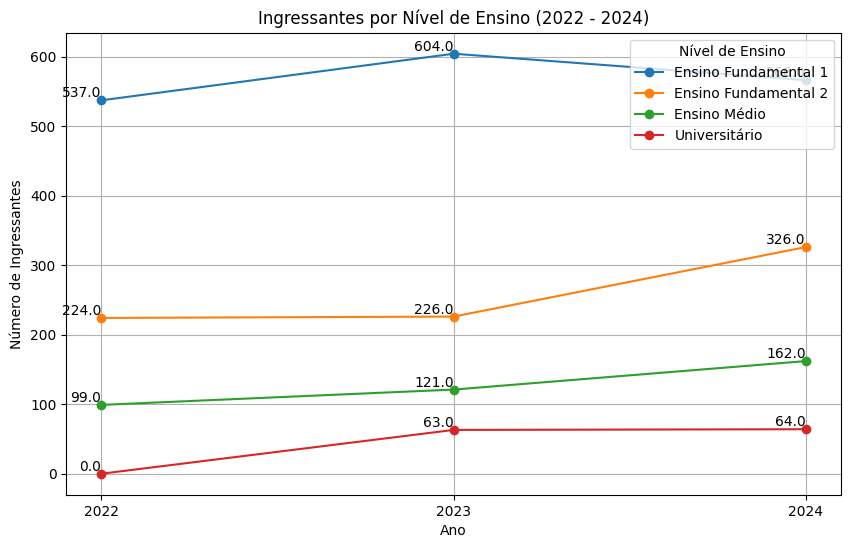

In [9]:
import matplotlib.pyplot as plt

# Criar gráfico de linhas para os ingressantes por nível de ensino
plt.figure(figsize=(10, 6))

for nivel in df_ingressantes["Nível Ensino"].unique():
    valores = df_ingressantes[df_ingressantes["Nível Ensino"] == nivel].iloc[:, 1:].values.flatten()
    anos = ["2022", "2023", "2024"]

    plt.plot(anos, valores, marker="o", label=nivel)

    # Adicionando rótulos nos pontos
    for i, valor in enumerate(valores):
        plt.text(anos[i], valor, str(valor), fontsize=10, ha="right", va="bottom")

# Configurar o gráfico
plt.xlabel("Ano")
plt.ylabel("Número de Ingressantes")
plt.title("Ingressantes por Nível de Ensino (2022 - 2024)")
plt.legend(title="Nível de Ensino")
plt.grid(True)

# Exibir o gráfico
plt.show()


**Analise dos resultados**

O gráfico apresenta a evolução do número de ingressantes por nível de ensino entre 2022 e 2024. O Ensino Fundamental 1 registra o maior número de ingressantes, com crescimento em 2023 e uma leve queda em 2024, mantendo-se como o nível mais procurado. O Ensino Fundamental 2 apresenta um crescimento constante ao longo do período, assim como o Ensino Médio, que mostra um aumento gradual, embora em menor escala. Já o nível Universitário tem um crescimento inicial de 2022 para 2023, estabilizando em 2024. Esses padrões indicam maior procura pelos níveis iniciais de ensino, com expansão gradativa nos demais, refletindo um possível aumento na continuidade educacional.

**2 - Participação e Engajamento**

Taxa de entrega de lições. - IEG (Indicador de Engajamento)

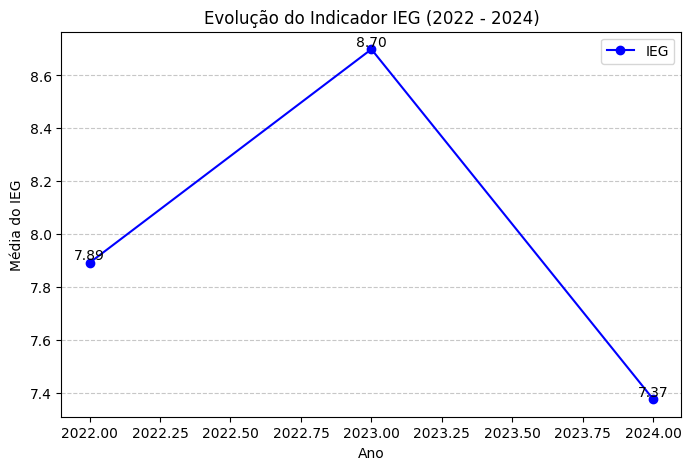

In [10]:
# Filtrar e selecionar apenas o indicador IEG e adicionar a coluna "Ano" a cada base
df_2022["Ano"] = 2022
df_2023["Ano"] = 2023
df_2024["Ano"] = 2024

df_ieg_2022 = df_2022[["IEG", "Ano"]].dropna()
df_ieg_2023 = df_2023[["IEG", "Ano"]].dropna()
df_ieg_2024 = df_2024[["IEG", "Ano"]].dropna()

# Concatenar as bases
df_ieg_total = pd.concat([df_ieg_2022, df_ieg_2023, df_ieg_2024], ignore_index=True)

# Calcular a média do IEG por ano
ieg_por_ano = df_ieg_total.groupby("Ano")["IEG"].mean().reset_index()

# Criar o gráfico de linha para demonstrar a evolução do IEG
plt.figure(figsize=(8, 5))
plt.plot(ieg_por_ano["Ano"], ieg_por_ano["IEG"], marker="o", linestyle="-", color="blue", label="IEG")

# Adicionar rótulos nos pontos
for i, valor in enumerate(ieg_por_ano["IEG"]):
    plt.text(ieg_por_ano["Ano"].iloc[i], valor, f"{valor:.2f}", ha="center", va="bottom", fontsize=10)

# Configurações do gráfico
plt.title("Evolução do Indicador IEG (2022 - 2024)")
plt.xlabel("Ano")
plt.ylabel("Média do IEG")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

Comparando os gráficos do IEG e do IDA, ambos apresentam um padrão semelhante de evolução entre 2022 e 2024, com crescimento em 2023 seguido por uma queda acentuada em 2024. O IEG cresce de 7.89 em 2022 para um pico de 8.70 em 2023, e então cai para 7.37 em 2024. O IDA segue a mesma tendência, subindo de 6.1 em 2022 para 6.7 em 2023, antes de diminuir para 6.4 em 2024. Essa correlação sugere que os dois indicadores estão alinhados e refletem mudanças semelhantes no desempenho ou nas condições educacionais ao longo do período. A queda em 2024 pode indicar desafios comuns que impactaram ambos os indicadores.

**Evolução do número de matrículas por ano**

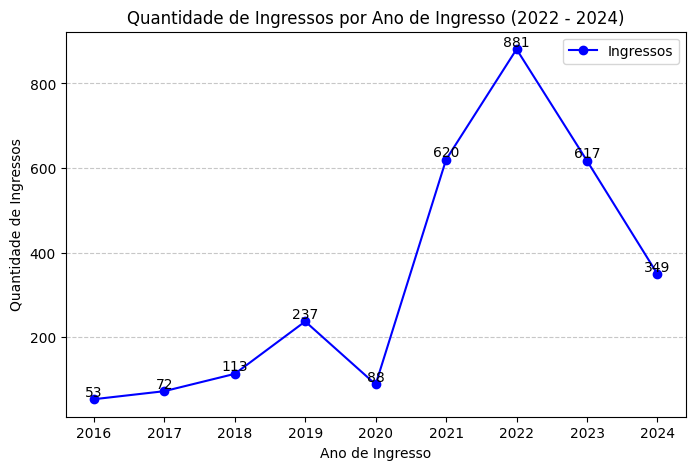

In [11]:
# Selecionar as colunas "Ano ingresso" e "RA" para cada base e adicionar a coluna "Ano" correspondente
df_ingresso_2022 = df_2022[["Ano ingresso", "RA"]].copy()
df_ingresso_2023 = df_2023[["Ano ingresso", "RA"]].copy()
df_ingresso_2024 = df_2024[["Ano ingresso", "RA"]].copy()

# Concatenar as bases de dados em um único dataframe consolidado
df_ingresso_consolidado = pd.concat([df_ingresso_2022, df_ingresso_2023, df_ingresso_2024], ignore_index=True)

df_ingresso_consolidado.head()

# Contar a quantidade de ingressos por ano de ingresso
ingressos_por_ano = df_ingresso_consolidado["Ano ingresso"].value_counts().sort_index().reset_index()
ingressos_por_ano.columns = ["Ano ingresso", "Quantidade"]

# Criar o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(ingressos_por_ano["Ano ingresso"], ingressos_por_ano["Quantidade"], marker="o", linestyle="-", color="blue", label="Ingressos")

# Adicionar rótulos nos pontos
for i, valor in enumerate(ingressos_por_ano["Quantidade"]):
    plt.text(ingressos_por_ano["Ano ingresso"].iloc[i], valor, str(valor), ha="center", va="bottom", fontsize=10)

# Configurações do gráfico
plt.title("Quantidade de Ingressos por Ano de Ingresso (2022 - 2024)")
plt.xlabel("Ano de Ingresso")
plt.ylabel("Quantidade de Ingressos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()


 Gráfico mostra a evolução da quantidade de ingressos por ano de 2016 a 2024. Observa-se um crescimento significativo entre 2020 e 2022, atingindo um pico de 881 ingressos em 2022. Após esse ponto, há uma leve redução em 2023, com 617 ingressos, e uma queda mais acentuada em 2024, registrando 349 ingressos. Essa tendência pode refletir fatores como mudanças na demanda educacional, políticas institucionais ou eventos externos que influenciaram o número de novos estudantes em cada ano. A recuperação após 2020 pode estar associada a uma retomada pós-pandemia, enquanto a queda a partir de 2023 sugere uma estabilização ou possível retração.

**3 - Impacto Social**

**Distribuição dos alunos por idade, gênero.**

A primeira informação que será coletada é a distribuição dos alunos por idade e fase de ensino. Além disso, será verificado se há algum outlier nos dados.

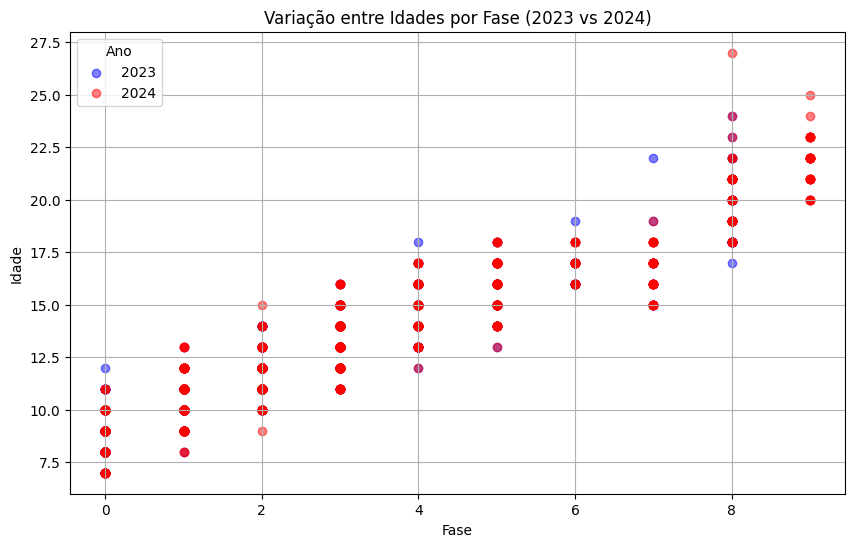

In [12]:
# Converter a coluna "Idade" para numérico, tratando possíveis valores inválidos
df_2023["Idade"] = pd.to_numeric(df_2023["Idade"], errors="coerce")
df_2024["Idade"] = pd.to_numeric(df_2024["Idade"], errors="coerce")

# Criar gráfico de dispersão para variação de idades nos anos de 2023 e 2024
plt.figure(figsize=(10, 6))

# Gráfico para 2023
plt.scatter(df_2023["Fase"], df_2023["Idade"], alpha=0.5, label="2023", color="blue")

# Gráfico para 2024
plt.scatter(df_2024["Fase"], df_2024["Idade"], alpha=0.5, label="2024", color="red")

# Configurar o gráfico
plt.xlabel("Fase")
plt.ylabel("Idade")
plt.title("Variação entre Idades por Fase (2023 vs 2024)")
plt.legend(title="Ano")
plt.grid(True)

# Exibir o gráfico
plt.show()

Ao analisar o gráfico de dispersão das idades por fase para os anos de 2023 e 2024, podemos observar alguns outliers—pontos que se desviam significativamente do


**Padrão Esperado**

*   Como cada fase corresponde a um nível de ensino específico, espera-se que a idade dos alunos esteja dentro de uma faixa relativamente estreita para cada fase.

*   Por exemplo, alunos do Ensino Fundamental 1 (Fases 0 a 2) deveriam ter idades entre 6 e 9 anos.

*   No Ensino Fundamental 2 (Fases 3 e 4), a faixa etária esperada seria 10 a 14 anos.

*   No Ensino Médio (Fases 5 a 7), os alunos normalmente têm 15 a 18 anos.

*   Para a Fase 8 (Universitário), a idade deveria estar acima de 18 anos.


Os outliers no gráfico indicam possíveis erros de dados, repetências excessivas ou alunos em situações
atípicas (como avanço ou retorno ao ensino).

Para validar a consistência dos dados, recomenda-se:

*   Revisar os registros de idade e fase para identificar anomalias.

*   Analisar casos específicos de alunos com idades discrepantes.

*   Investigar se há políticas educacionais que explicam essas variações (exemplo: programas de ensino para adultos).


**Segunda informação é a distribuição dos alunos entre homens e mulheres, e o engajamento (IEG)**

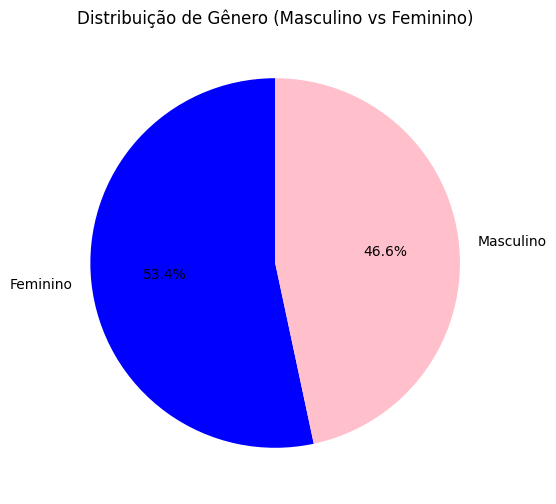

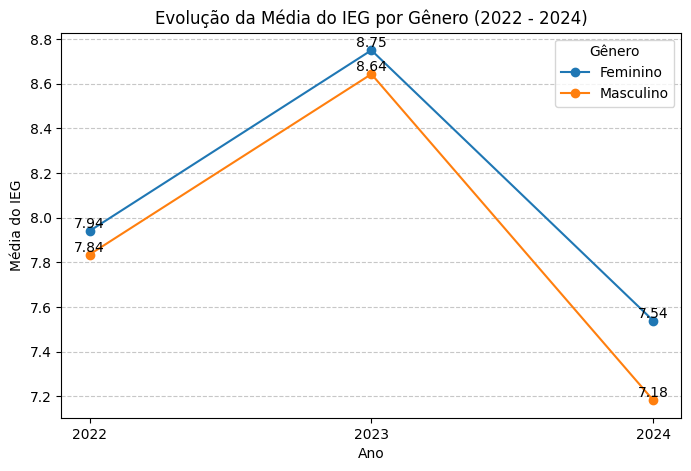

In [13]:
# Criar função para padronizar a coluna "Gênero"
def padronizar_genero(valor):
    if isinstance(valor, str):
        if valor.lower() in ["masculino", "menino", "m"]:
            return "Masculino"
        elif valor.lower() in ["feminino", "menina", "f"]:
            return "Feminino"
    return None  # Retornar None para valores que não se encaixam

# Selecionar e padronizar os dados
df_genero_2022 = df_2022[["Gênero", "IEG"]].copy()
df_genero_2022["Gênero"] = df_genero_2022["Gênero"].apply(padronizar_genero)

df_genero_2023 = df_2023[["Gênero", "IEG"]].copy()
df_genero_2023["Gênero"] = df_genero_2023["Gênero"].apply(padronizar_genero)

df_genero_2024 = df_2024[["Gênero", "IEG"]].copy()
df_genero_2024["Gênero"] = df_genero_2024["Gênero"].apply(padronizar_genero)

# Concatenar os dataframes e remover valores nulos
df_genero_total = pd.concat([df_genero_2022, df_genero_2023, df_genero_2024], ignore_index=True).dropna()

df_genero_total.head(5)

import matplotlib.pyplot as plt

# Contar a quantidade de registros por gênero
genero_counts = df_genero_total["Gênero"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(genero_counts, labels=genero_counts.index, autopct="%1.1f%%", colors=["blue", "pink"], startangle=90)

# Configurações do gráfico
plt.title("Distribuição de Gênero (Masculino vs Feminino)")

# Exibir o gráfico
plt.show()

# Adicionar a coluna "Ano" ao dataframe original
df_genero_2022["Ano"] = 2022
df_genero_2023["Ano"] = 2023
df_genero_2024["Ano"] = 2024

# Concatenar novamente os dataframes
df_genero_total = pd.concat([df_genero_2022, df_genero_2023, df_genero_2024], ignore_index=True).dropna()

# Calcular a média do indicador IEG por gênero e ano
df_ieg_media = df_genero_total.groupby(["Ano", "Gênero"])["IEG"].mean().reset_index()

# Criar gráfico de linha para comparar o IEG entre homens e mulheres ao longo dos anos
plt.figure(figsize=(8, 5))

# Plotar as linhas
for genero in df_ieg_media["Gênero"].unique():
    subset = df_ieg_media[df_ieg_media["Gênero"] == genero]
    plt.plot(subset["Ano"], subset["IEG"], marker="o", linestyle="-", label=genero)

    # Adicionar rótulos nos pontos
    for i, valor in enumerate(subset["IEG"]):
        plt.text(subset["Ano"].iloc[i], valor, f"{valor:.2f}", ha="center", va="bottom", fontsize=10)

# Configurações do gráfico
plt.xlabel("Ano")
plt.ylabel("Média do IEG")
plt.title("Evolução da Média do IEG por Gênero (2022 - 2024)")
plt.xticks([2022, 2023, 2024])
plt.legend(title="Gênero")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

O gráfico mostra a evolução da média do indicador IEG por gênero entre 2022 e 2024, evidenciando que o desempenho das mulheres foi consistentemente superior ao dos homens em todos os anos analisados. Ambos os gêneros apresentaram um crescimento na média do IEG de 2022 para 2023, atingindo os picos de 8.75 (feminino) e 8.64 (masculino). No entanto, em 2024, houve uma queda acentuada para ambos os gêneros, com as mulheres registrando uma média de 7.54 e os homens 7.18, valores abaixo dos níveis observados em 2022. Essa redução pode indicar possíveis mudanças nas condições educacionais, metodologias de avaliação ou outros fatores que afetaram o desempenho geral.


**Taxa de evasão (alunos que saíram antes de completar o curso)**

In [14]:
# Carregar os dados da aba "Base Alunos 1211"
df_base_alunos = pd.read_excel(file_path, sheet_name="Alunos - 1211")

# Verificar as primeiras linhas para entender a estrutura
df_base_alunos.head()

# Verificar valores únicos na coluna "SITUAÇÃO" para identificar desistentes
df_base_alunos["SITUAÇÃO"].unique()

# Filtrar os alunos desistentes
df_desistentes = df_base_alunos[df_base_alunos["SITUAÇÃO"] == "Desistente"].copy()

# Converter a coluna "DATA DE MATRÍCULA" para datetime
df_desistentes["DATA DE MATRÍCULA"] = pd.to_datetime(df_desistentes["DATA DE MATRÍCULA"], errors="coerce")

# Criar uma coluna com o mês da desistência
df_desistentes["Mês"] = df_desistentes["DATA DE MATRÍCULA"].dt.strftime("%Y-%m")

# Contar a quantidade de desistentes por mês em 2024
desistentes_por_mes = df_desistentes["Mês"].value_counts().sort_index().reset_index()
desistentes_por_mes.columns = ["Mês", "Quantidade de Desistentes"]

# Calcular a porcentagem de evasão geral
total_alunos = len(df_base_alunos)
total_desistentes = len(df_desistentes)
percentual_evasao = (total_desistentes / total_alunos) * 100

# Exibir a porcentagem de evasão
percentual_evasao

# Exibir os dados
desistentes_por_mes.head()

,Mês,Quantidade de Desistentes
0,2024-01,282
1,2024-08,1


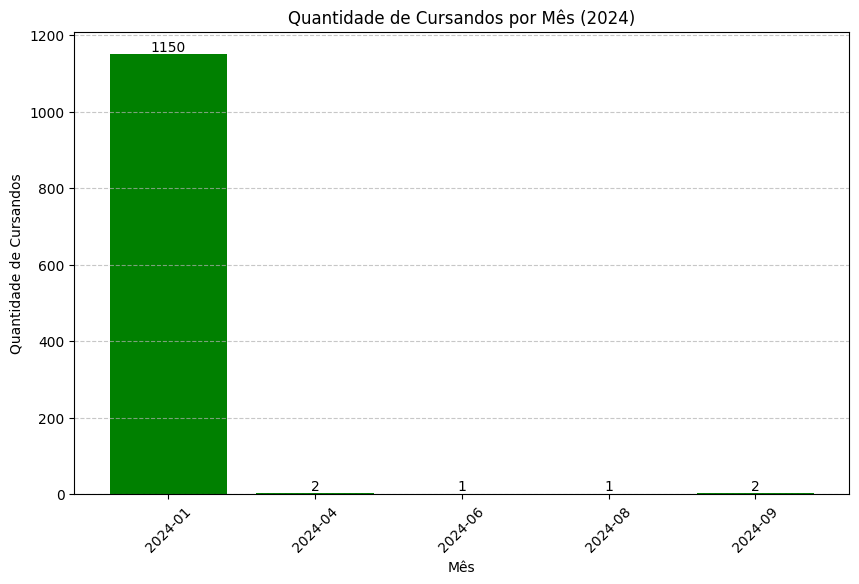

In [15]:
# Recarregar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Recarregar o arquivo de dados
file_path = "/content/PEDE 2024 - DATATHON.xlsx"

# Carregar os dados da aba correta "Alunos - 1211"
df_base_alunos = pd.read_excel(file_path, sheet_name="Alunos - 1211")

# Filtrar os alunos que ainda estão cursando
df_cursando = df_base_alunos[df_base_alunos["SITUAÇÃO"] == "Cursando"].copy()

# Converter a coluna "DATA DE MATRÍCULA" para datetime
df_cursando["DATA DE MATRÍCULA"] = pd.to_datetime(df_cursando["DATA DE MATRÍCULA"], errors="coerce")

# Criar uma coluna com o mês da matrícula
df_cursando["Mês"] = df_cursando["DATA DE MATRÍCULA"].dt.strftime("%Y-%m")

# Contar a quantidade de alunos cursando por mês em 2024
cursando_por_mes = df_cursando["Mês"].value_counts().sort_index().reset_index()
cursando_por_mes.columns = ["Mês", "Quantidade de Cursandos"]

# Criar gráfico de barras para mostrar a quantidade de cursandos por mês
plt.figure(figsize=(10, 6))
bars = plt.bar(cursando_por_mes["Mês"], cursando_por_mes["Quantidade de Cursandos"], color="green")

# Adicionar rótulos nas colunas
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.xlabel("Mês")
plt.ylabel("Quantidade de Cursandos")
plt.title("Quantidade de Cursandos por Mês (2024)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()


In [16]:
merged_df = pd.merge(desistentes_por_mes, cursando_por_mes, on='Mês', how='outer')

# Substitui valores NaN por 0.
merged_df.fillna(0, inplace=True)

# Filtra os dados para o ano de 2024.
merged_df_2024 = merged_df[merged_df['Mês'].str.startswith('2024')]

# Calcula o número total de alunos (desistentes + cursando) para cada mês em 2024.
merged_df_2024['Total'] = merged_df_2024['Quantidade de Desistentes'] + merged_df_2024['Quantidade de Cursandos']

# Calcula a taxa de desistência para cada mês em 2024.
merged_df_2024['Taxa de Desistência (%)'] = (merged_df_2024['Quantidade de Desistentes'] / merged_df_2024['Total']) * 100

# Exibe o resultado.
print(merged_df_2024)

# Calcula a taxa de desistência geral para 2024.
total_desistentes_2024 = merged_df_2024['Quantidade de Desistentes'].sum()
total_students_2024 = merged_df_2024['Total'].sum()
overall_dropout_rate_2024 = (total_desistentes_2024 / total_students_2024) * 100

print(f"\nTaxa de Desistência Geral em 2024: {overall_dropout_rate_2024:.2f}%")


       Mês  Quantidade de Desistentes  Quantidade de Cursandos   Total  \
0  2024-01                      282.0                     1150  1432.0   
1  2024-04                        0.0                        2     2.0   
2  2024-06                        0.0                        1     1.0   
3  2024-08                        1.0                        1     2.0   
4  2024-09                        0.0                        2     2.0   

   Taxa de Desistência (%)  
0                19.692737  
1                 0.000000  
2                 0.000000  
3                50.000000  
4                 0.000000  

Taxa de Desistência Geral em 2024: 19.67%


**Comparação do desempenho entre escolas pública e privada.**

In [17]:
# Identificar o nome correto da coluna de instituição de ensino
coluna_escola_2023 = "Instituição de ensino"
coluna_escola_2024 = "Instituição de ensino"

# Criar função de padronização
def categorizar_escola(nome_escola):
    if isinstance(nome_escola, str):
        if "pública" in nome_escola.lower():
            return "Pública"
        elif "privada" in nome_escola.lower():
            return "Privada"
    return "Outros"

# Aplicar padronização para as bases de 2023 e 2024
df_2023["Tipo Escola"] = df_2023[coluna_escola_2023].apply(categorizar_escola)
df_2024["Tipo Escola"] = df_2024[coluna_escola_2024].apply(categorizar_escola)

# Verificar os resultados
df_2023["Tipo Escola"].value_counts(), df_2024["Tipo Escola"].value_counts()


(Tipo Escola
 Pública    809
 Privada    196
 Outros       9
 Name: count, dtype: int64,
 Tipo Escola
 Pública    913
 Privada    222
 Outros      21
 Name: count, dtype: int64)

Criando um df com as colunas "RA", "Tipo escola", "IDA" e "Ano", com o objetivo de usar o df para comprar o desenpenho entre escolas publicas e privadas.


In [18]:
# Criar um dataframe contendo apenas as colunas "RA", "Tipo Escola" e "IDA" para as bases de 2023 e 2024
df_ida_2023 = df_2023[["RA", "Tipo Escola", "IDA"]].copy()
df_ida_2024 = df_2024[["RA", "Tipo Escola", "IDA"]].copy()

# Adicionar um identificador do ano
df_ida_2023["Ano"] = 2023
df_ida_2024["Ano"] = 2024

# Concatenar os dois dataframes
df_ida_total = pd.concat([df_ida_2023, df_ida_2024], ignore_index=True)

# Remover todas as linhas com valores nulos em qualquer coluna
df_ida_total_clean = df_ida_total.dropna()

df_ida_total_clean

,RA,Tipo Escola,IDA,Ano
0,RA-861,Pública,9.600000,2023
1,RA-862,Pública,8.900000,2023
2,RA-863,Pública,6.300000,2023
3,RA-864,Pública,6.300000,2023
4,RA-865,Pública,7.400000,2023
...,...,...,...,...
2064,RA-86,Privada,5.483333,2024
2065,RA-143,Privada,2.633333,2024
2066,RA-166,Privada,8.266667,2024
2067,RA-191,Privada,6.400000,2024


Calculando a média de notas entre escolas publicas e privadas ao longo de 2023 e 2024.

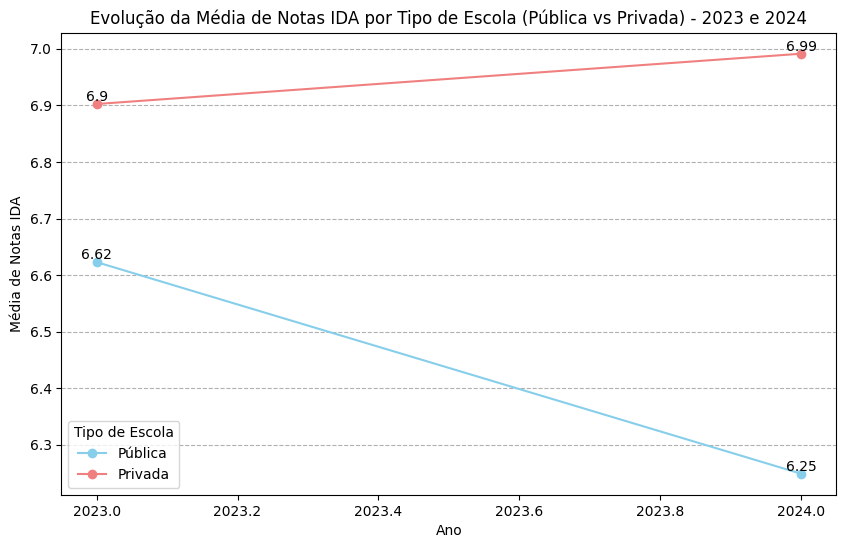

In [19]:
# Filtrar apenas escolas públicas e privadas
df_public_private = df_ida_total_clean[df_ida_total_clean["Tipo Escola"].isin(["Pública", "Privada"])].copy()

# Calcular a média do IDA para escolas públicas e privadas por ano
average_ida_by_school_type_year = df_public_private.groupby(["Ano", "Tipo Escola"])["IDA"].mean().unstack()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))

# Plotar a linha para escolas públicas
plt.plot(average_ida_by_school_type_year.index, average_ida_by_school_type_year["Pública"],
         marker="o", label="Pública", color="skyblue")

# Plotar a linha para escolas privadas
plt.plot(average_ida_by_school_type_year.index, average_ida_by_school_type_year["Privada"],
         marker="o", label="Privada", color="lightcoral")

# Adicionar rótulos nos pontos de dados
for year in average_ida_by_school_type_year.index:
    # Rótulo para escolas públicas
    plt.text(year, average_ida_by_school_type_year.loc[year, "Pública"],
             round(average_ida_by_school_type_year.loc[year, "Pública"], 2), ha='center', va='bottom')
    # Rótulo para escolas privadas
    plt.text(year, average_ida_by_school_type_year.loc[year, "Privada"],
             round(average_ida_by_school_type_year.loc[year, "Privada"], 2), ha='center', va='bottom')

# Definir o título e os rótulos dos eixos
plt.title("Evolução da Média de Notas IDA por Tipo de Escola (Pública vs Privada) - 2023 e 2024")
plt.xlabel("Ano")
plt.ylabel("Média de Notas IDA")

# Adicionar legenda
plt.legend(title="Tipo de Escola")

# Adicionar grade
plt.grid(axis='y', linestyle='--')

# Exibir o gráfico
plt.show()

**Índices de vulnerabilidade e seu impacto no aprendizado**

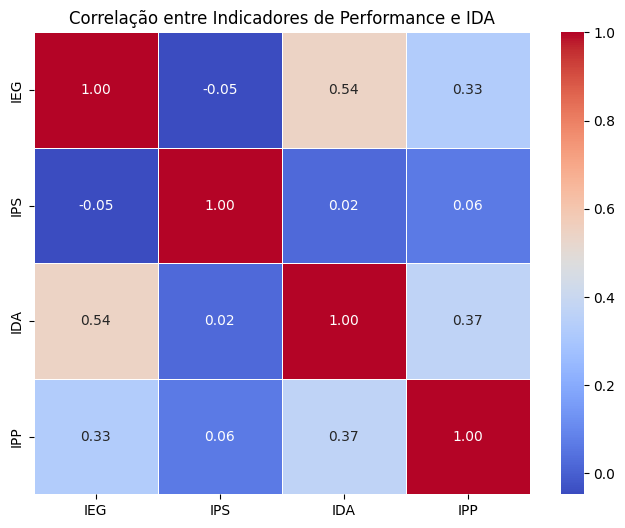

In [20]:
# Ajustar os nomes das colunas para manter um padrão entre os três dataframes
mapeamento_colunas = {
    "IPP": "IPP",
    "IEG": "IEG",
    "IPS": "IPS",
    "IDA": "IDA"
}

# Filtrar apenas as colunas de interesse e renomeá-las
df_2022_clean = df_2022.rename(columns=mapeamento_colunas)[["IEG", "IPS", "IDA"]].dropna()
df_2023_clean = df_2023.rename(columns=mapeamento_colunas)[["IPP", "IEG", "IPS", "IDA"]].dropna()
df_2024_clean = df_2024.rename(columns=mapeamento_colunas)[["IPP", "IEG", "IPS", "IDA"]].dropna()

# Unir as bases de dados
df_corr_total = pd.concat([df_2022_clean, df_2023_clean, df_2024_clean], ignore_index=True)

# Calcular a matriz de correlação
correlation_matrix = df_corr_total.corr()

# Criar o gráfico de correlação (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Configurações do gráfico
plt.title("Correlação entre Indicadores de Performance e IDA")
plt.show()

**Análise do Gráfico de Correlação entre Indicadores de Performance e IDA**

O gráfico de heatmap de correlação demonstra a relação estatística entre os indicadores de performance (IPP, IEG, IPS) e o IDA, que mede o desempenho dos alunos. A correlação varia de -1 a 1, onde:


*   **Correlação positiva (+1):** Os dois indicadores aumentam ou diminuem juntos.
*   **Correlação negativa (-1):** Quando um indicador aumenta, o outro diminui.
*   **Correlação próxima de 0:** Indica uma relação fraca ou inexistente entre os indicadores.

**Principais Observações**

1.   Correlação entre IDA e os Indicadores de Performance

*   Se a correlação entre IDA e IPP, IEG, IPS for alta (próxima de 1), isso indica que o desempenho do aluno (IDA) está fortemente relacionado ao desempenho nos outros indicadores.

*   Se a correlação for baixa ou negativa, significa que IDA pode não depender diretamente desses indicadores ou que outros fatores influenciam seu desempenho.

2.   Correlação entre os Indicadores de Performance entre si

*   Caso IPP, IEG e IPS apresentem correlação alta entre si, isso sugere que esses indicadores avaliam aspectos semelhantes do desempenho dos alunos.

*   Se a correlação entre esses indicadores for baixa, pode indicar que cada um mede aspectos distintos do aprendizado.


**4 - Comparação com a Média Geral**

No Brasil, as médias de notas dos alunos variam significativamente entre as redes pública e privada de ensino. No Exame Nacional do Ensino Médio (Enem) de 2022, por exemplo, a média na redação para estudantes de escolas privadas foi de 747 pontos, enquanto para os de escolas públicas foi de 553 pontos. Em 2018, essas médias eram de 644 e 382 pontos, respectivamente, indicando uma redução na diferença de desempenho ao longo dos anos.
FOnte: BRASIL247.COM

Nas provas objetivas do Enem 2022, a diferença de desempenho também é notável. Em Matemática, a média dos alunos de escolas privadas foi de 609 pontos, comparada a 510 pontos para os de escolas públicas. Em Linguagens, as médias foram de 555 pontos para escolas privadas e 494 pontos para públicas.
Fonte: BRASIL247.COM

Em avaliações internacionais, como o Programa Internacional de Avaliação de Estudantes (PISA) de 2022, os alunos de escolas particulares brasileiras obtiveram 456 pontos em Matemática, abaixo da média da Organização para a Cooperação e Desenvolvimento Econômico (OCDE), que é de 472 pontos. Mesmo os estudantes mais ricos do país não alcançaram a média da OCDE, ficando atrás de países como Turquia e Vietnã.
Fonte: G1.GLOBO.COM

Esses dados evidenciam disparidades significativas no desempenho acadêmico entre alunos de escolas públicas e privadas no Brasil, embora haja uma tendência de redução dessa diferença ao longo dos anos.

In [21]:
# Dados das médias de notas no ENEM 2022 para escolas públicas e privadas
dados = {
    "Disciplina": ["Redação", "Matemática", "Linguagens"],
    "Escola Pública": [553, 510, 494],
    "Escola Privada": [747, 609, 555],
}

# Criar DataFrame
df_notas_brasil = pd.DataFrame(dados)

# Normalizar as notas para o intervalo de 0 a 10
# Consideramos a pontuação mínima do ENEM como 0 e a máxima como 1000
df_notas_brasil["Escola Pública (0-10)"] = (df_notas_brasil["Escola Pública"] / 1000) * 10
df_notas_brasil["Escola Privada (0-10)"] = (df_notas_brasil["Escola Privada"] / 1000) * 10

In [22]:
df_notas_brasil.head()

,Disciplina,Escola Pública,Escola Privada,Escola Pública (0-10),Escola Privada (0-10)
0,Redação,553,747,5.53,7.47
1,Matemática,510,609,5.10,6.09
2,Linguagens,494,555,4.94,5.55
